## S08 T01: Tasca Feature Engineering

### Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

I have chosen a dataset about Women NBA:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/Diana/Downloads/WNBA Stats.csv')
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [3]:
df.dropna()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0


In [4]:
df.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [5]:
#droppping the columns I won't need:

wnba=df.drop(['Birth_Place','Birthdate','Experience','FGM','FGA','15:00', '3PA','FTM', 'FTA','OREB',
       'DREB', 'REB','TO','DD2', 'TD3'], axis=1)
wnba

,Name,Team,Pos,Height,Weight,BMI,Age,College,Games Played,MIN,FG%,3P%,FT%,AST,STL,BLK,PTS
0,Aerial Powers,DAL,F,183,71.0,21.200991,23,Michigan State,8,173,35.3,37.5,80.8,12,3,6,93
1,Alana Beard,LA,G/F,185,73.0,21.329438,35,Duke,30,947,50.8,27.8,78.0,72,63,13,217
2,Alex Bentley,CON,G,170,69.0,23.875433,26,Penn State,26,617,37.6,29.7,83.3,78,22,3,218
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,28,Georgia Tech,31,721,38.5,30.9,81.0,65,20,10,188
4,Alexis Jones,MIN,G,175,78.0,25.469388,23,Baylor,24,137,32.0,35.0,91.7,12,7,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,27,Connecticut,29,861,43.5,38.4,84.5,69,37,8,467
139,Tiffany Jackson,LA,F,191,84.0,23.025685,32,Texas,22,127,48.0,0.0,66.7,3,1,3,28
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,32,South Carolina,27,671,34.9,24.6,92.2,39,31,5,277
141,Tina Charles,NY,F/C,193,84.0,22.550941,29,Connecticut,29,952,44.6,32.1,81.5,75,21,22,582


In [6]:
#check for duplicates

sum(wnba.duplicated())

0

In [7]:
#check if I still missing values. PCA didn't work for me before because I still had NaN values

wnba.isnull().sum()

Name            0
Team            0
Pos             0
Height          0
Weight          1
BMI             1
Age             0
College         0
Games Played    0
MIN             0
FG%             0
3P%             0
FT%             0
AST             0
STL             0
BLK             0
PTS             0
dtype: int64

In [8]:
#drop the specific values

wnba.dropna(subset=['Weight','BMI'], inplace=True)

In [9]:
wnba.describe().round(2)

,Height,Weight,BMI,Age,Games Played,MIN,FG%,3P%,FT%,AST,STL,BLK,PTS
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,184.61,78.98,23.09,27.11,24.43,500.11,43.10,24.98,75.83,44.51,17.73,9.78,203.17
std,8.70,11.00,2.07,3.67,7.08,289.37,9.86,18.46,18.54,41.49,13.41,12.54,153.03
min,165.00,55.00,18.39,21.00,2.00,12.00,16.70,0.00,0.00,0.00,0.00,0.00,2.00
25%,175.75,71.50,21.79,24.00,22.00,242.25,37.12,0.00,71.58,11.25,7.00,2.00,77.25
50%,185.00,79.00,22.87,27.00,27.50,506.00,42.05,30.55,80.00,34.00,15.00,5.00,181.00
75%,191.00,86.00,24.18,30.00,29.00,752.50,48.62,36.18,85.92,66.75,27.50,12.00,277.75
max,206.00,113.00,31.56,36.00,32.00,1018.00,100.00,100.00,100.00,206.00,63.00,64.00,584.00


In [10]:
#I will dummy 'Pos' values

wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [11]:
dummy=pd.get_dummies(wnba['Pos'])
dummy.head()

,C,F,F/C,G,G/F
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0


In [12]:
#concatenate dummy and wnba dataset

wnba=pd.concat([wnba,dummy], axis=1)
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Age,College,Games Played,MIN,...,FT%,AST,STL,BLK,PTS,C,F,F/C,G,G/F
0,Aerial Powers,DAL,F,183,71.0,21.200991,23,Michigan State,8,173,...,80.8,12,3,6,93,0,1,0,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,35,Duke,30,947,...,78.0,72,63,13,217,0,0,0,0,1
2,Alex Bentley,CON,G,170,69.0,23.875433,26,Penn State,26,617,...,83.3,78,22,3,218,0,0,0,1,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,28,Georgia Tech,31,721,...,81.0,65,20,10,188,0,0,0,0,1
4,Alexis Jones,MIN,G,175,78.0,25.469388,23,Baylor,24,137,...,91.7,12,7,0,50,0,0,0,1,0


In [13]:
#standardize the data with StandardScaler

from sklearn.preprocessing import StandardScaler

In [14]:
#initialize the scaler

scaler = StandardScaler()

In [15]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Age', 'College',
       'Games Played', 'MIN', 'FG%', '3P%', 'FT%', 'AST', 'STL', 'BLK', 'PTS',
       'C', 'F', 'F/C', 'G', 'G/F'],
      dtype='object')

In [16]:
#reorder columns so it can be easier to apply method for numerical values

wnba=wnba.loc[:, ['Name', 'Team','Pos','C', 'F', 'F/C', 'G', 'G/F','College','Height', 'Weight', 'BMI','Age','Games Played', 'MIN', 'FG%', '3P%', 'FT%', 'AST', 'STL', 'BLK', 'PTS']]
wnba

,Name,Team,Pos,C,F,F/C,G,G/F,College,Height,...,Age,Games Played,MIN,FG%,3P%,FT%,AST,STL,BLK,PTS
0,Aerial Powers,DAL,F,0,1,0,0,0,Michigan State,183,...,23,8,173,35.3,37.5,80.8,12,3,6,93
1,Alana Beard,LA,G/F,0,0,0,0,1,Duke,185,...,35,30,947,50.8,27.8,78.0,72,63,13,217
2,Alex Bentley,CON,G,0,0,0,1,0,Penn State,170,...,26,26,617,37.6,29.7,83.3,78,22,3,218
3,Alex Montgomery,SAN,G/F,0,0,0,0,1,Georgia Tech,185,...,28,31,721,38.5,30.9,81.0,65,20,10,188
4,Alexis Jones,MIN,G,0,0,0,1,0,Baylor,175,...,23,24,137,32.0,35.0,91.7,12,7,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,0,0,0,1,0,Connecticut,178,...,27,29,861,43.5,38.4,84.5,69,37,8,467
139,Tiffany Jackson,LA,F,0,1,0,0,0,Texas,191,...,32,22,127,48.0,0.0,66.7,3,1,3,28
140,Tiffany Mitchell,IND,G,0,0,0,1,0,South Carolina,175,...,32,27,671,34.9,24.6,92.2,39,31,5,277
141,Tina Charles,NY,F/C,0,0,1,0,0,Connecticut,193,...,29,29,952,44.6,32.1,81.5,75,21,22,582


In [17]:
#identify the numeric variables to be scaled. In this case, the last 13 columns contain numeric variables to scale

wnba_scaled=wnba.copy()

numeric=wnba_scaled.columns[-13:]

# fit the data using the scaler
wnba_scaled[numeric]= scaler.fit_transform(wnba_scaled[numeric])
wnba_scaled.head()

,Name,Team,Pos,C,F,F/C,G,G/F,College,Height,...,Age,Games Played,MIN,FG%,3P%,FT%,AST,STL,BLK,PTS
0,Aerial Powers,DAL,F,0,1,0,0,0,Michigan State,-0.186061,...,-1.125452,-2.330265,-1.134394,-0.794549,0.680758,0.269135,-0.786420,-1.101702,-0.302694,-0.722454
1,Alana Beard,LA,G/F,0,0,0,0,1,Duke,0.044687,...,2.158401,0.790073,1.549819,0.783792,0.153411,0.117544,0.664803,3.387300,0.257600,0.090699
2,Alex Bentley,CON,G,0,0,0,1,0,Penn State,-1.685926,...,-0.304489,0.222739,0.405387,-0.560343,0.256705,0.404484,0.809926,0.319815,-0.542820,0.097257
3,Alex Montgomery,SAN,G/F,0,0,0,0,1,Georgia Tech,0.044687,...,0.242820,0.931906,0.766056,-0.468698,0.321944,0.279963,0.495494,0.170182,0.017474,-0.099474
4,Alexis Jones,MIN,G,0,0,0,1,0,Baylor,-1.109055,...,-1.125452,-0.060928,-1.259241,-1.130583,0.544843,0.859257,-0.786420,-0.802436,-0.782946,-1.004435


In [18]:
wnba_scaled.describe().round(2)

,C,F,F/C,G,G/F,Height,Weight,BMI,Age,Games Played,MIN,FG%,3P%,FT%,AST,STL,BLK,PTS
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,0.18,0.23,0.08,0.42,0.09,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,0.38,0.42,0.28,0.49,0.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,0.00,0.00,0.00,0.00,-2.26,-2.19,-2.27,-1.67,-3.18,-1.69,-2.69,-1.36,-4.11,-1.08,-1.33,-0.78,-1.32
25%,0.00,0.00,0.00,0.00,0.00,-1.02,-0.68,-0.63,-0.85,-0.34,-0.89,-0.61,-1.36,-0.23,-0.80,-0.80,-0.62,-0.83
50%,0.00,0.00,0.00,0.00,0.00,0.04,0.00,-0.11,-0.03,0.44,0.02,-0.11,0.30,0.23,-0.25,-0.20,-0.38,-0.15
75%,0.00,0.00,0.00,1.00,0.00,0.74,0.64,0.53,0.79,0.65,0.88,0.56,0.61,0.55,0.54,0.73,0.18,0.49
max,1.00,1.00,1.00,1.00,1.00,2.47,3.10,4.10,2.43,1.07,1.80,5.79,4.08,1.31,3.91,3.39,4.34,2.50


As we can observe with this method, the values have been standardized, meaning centering the distribution of the data on the value 0 and the standard deviation to the value 1.

### Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

*Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data*

In [19]:
from sklearn.decomposition import PCA

#Apply PCA to obtain a minimum explained, in this case 85%
pca=PCA(n_components=0.85) 

#get principal components
pca.fit(wnba_scaled[numeric])

#transform our data with the new PCA dimensions
wnba_scaled_pca=pca.transform(wnba_scaled[numeric])
 
print("shape of wnba_pca", wnba_scaled_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('sum:',sum(expl[0:7]))

shape of wnba_pca (142, 7)
[0.35266764 0.18403866 0.09469331 0.08822886 0.06995055 0.05417505
 0.04927401]
sum: 0.8930280796383246


This result means that we need at least 7 principal components to explain at least 85% of the variability (in this case, 89,3%)

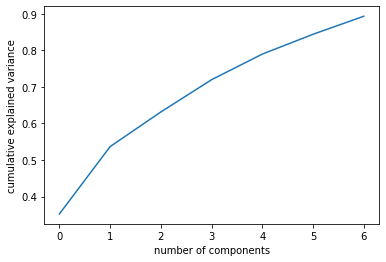

In [20]:
#This chart shows us the cumulative variance for each dimension

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we said, we can clearly observe in this plot that with 7 PC we get almost 90% of variability.

Text(0, 0.5, 'Second principal component')

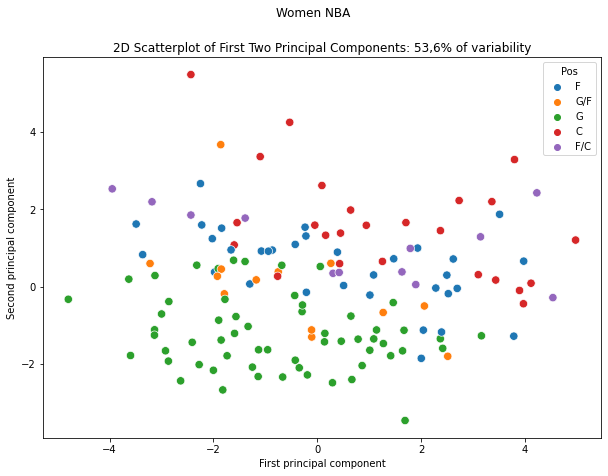

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=wnba_scaled_pca[:,0], y=wnba_scaled_pca[:,1], s=70, hue=wnba.Pos)
plt.title("2D Scatterplot of First Two Principal Components: 53,6% of variability")
plt.suptitle("Women NBA")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

The two compoments are not enough to explain variations on each category as categories can't be separated.

### Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

*I would like to compare these variables: points obtained, minutes played.*

In [22]:
wnba.describe()[['MIN','PTS']].round(2)

,MIN,PTS
count,142.00,142.00
mean,500.11,203.17
std,289.37,153.03
min,12.00,2.00
25%,242.25,77.25
50%,506.00,181.00
75%,752.50,277.75
max,1018.00,584.00


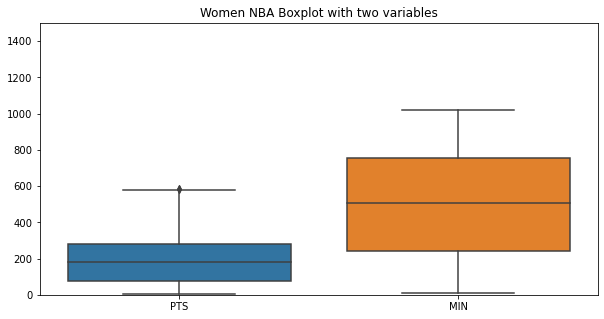

In [23]:
#Visualize original dataframe first to project outliers

plt.figure(figsize=(10,5))
plt.ylim(0, 1500);
sns.boxplot(data=wnba[['PTS','MIN']]);
plt.title('Women NBA Boxplot with two variables');

We don't seem to have a lot of outliers but some in 'PTS' variable.

One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

This is called robust standardization or robust data scaling.

In [24]:
from sklearn.preprocessing import RobustScaler

#initiate Robust Scaler
trans=RobustScaler()

wnba_robust=wnba.copy()

numeric=wnba_robust.columns[-13:]

#perform a robust scaler transform of the dataset
wnba_robust[numeric]= trans.fit_transform(wnba_robust[numeric])
wnba_robust[numeric].describe()[['MIN','PTS']]

,MIN,PTS
count,142.000000,142.000000
mean,-0.011552,0.110569
std,0.567121,0.763255
min,-0.968153,-0.892768
25%,-0.516903,-0.517456
50%,0.000000,0.000000
75%,0.483097,0.482544
max,1.003430,2.009975


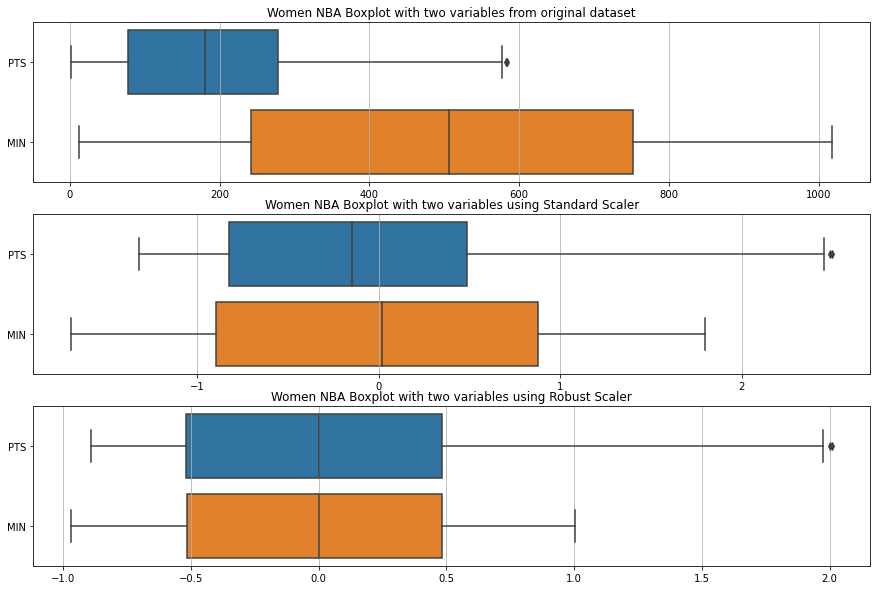

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.boxplot(data=wnba[['PTS','MIN']], orient='h');
plt.title('Women NBA Boxplot with two variables from original dataset');
plt.grid(axis='x')

plt.subplot(3,1,2)
sns.boxplot(data=wnba_scaled[['PTS','MIN']], orient='h');
plt.title('Women NBA Boxplot with two variables using Standard Scaler');
plt.grid(axis='x')

plt.subplot(3,1,3)
sns.boxplot(data=wnba_robust[numeric][['PTS','MIN']], orient='h');
plt.title('Women NBA Boxplot with two variables using Robust Scaler');
plt.grid(axis='x')

We can observe that with the use of Robust Scaler we have obtained a more normalized distribution. 